# **Salwa Fayyad 1200430 Assignment_2**


---




### **Libraries**

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



# **PART ONE**
### **[1] Reading data set and splitting it into training set, validation set and testing set.**

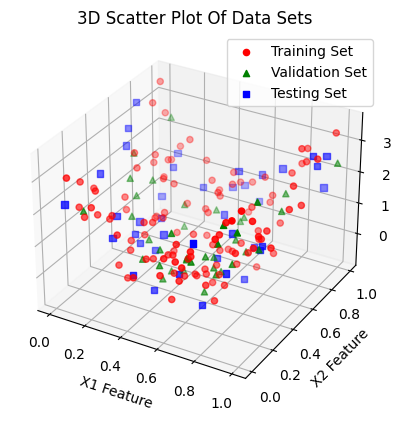

In [53]:

# Read data from CSV file
data = pd.read_csv('/content/data_reg.csv')

# Split the data into training, validation, and testing sets
training_set = data[:120]
validation_set = data[120:160]
testing_set = data[160:]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot training set, testing set and validation set
ax.scatter(training_set['x1'], training_set['x2'], training_set['y'], c='r', marker='o', label='Training Set')
ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], c='g', marker='^', label='Validation Set')
ax.scatter(testing_set['x1'], testing_set['x2'], testing_set['y'], c='b', marker='s', label='Testing Set')

ax.set_title('3D Scatter Plot Of Data Sets')
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Target Label (Y)')

ax.legend()

plt.show()


**As shown in the figure apove, the data set is splitting into three types  by extracting the target variable (Y) and the features (X1) & (X2). The red one is training set, the green one is validation set and the blue one is testing set.**

### **[2] Exploring Regression Models from Degree 1 to 10 and represent Validating with Error Analysis**

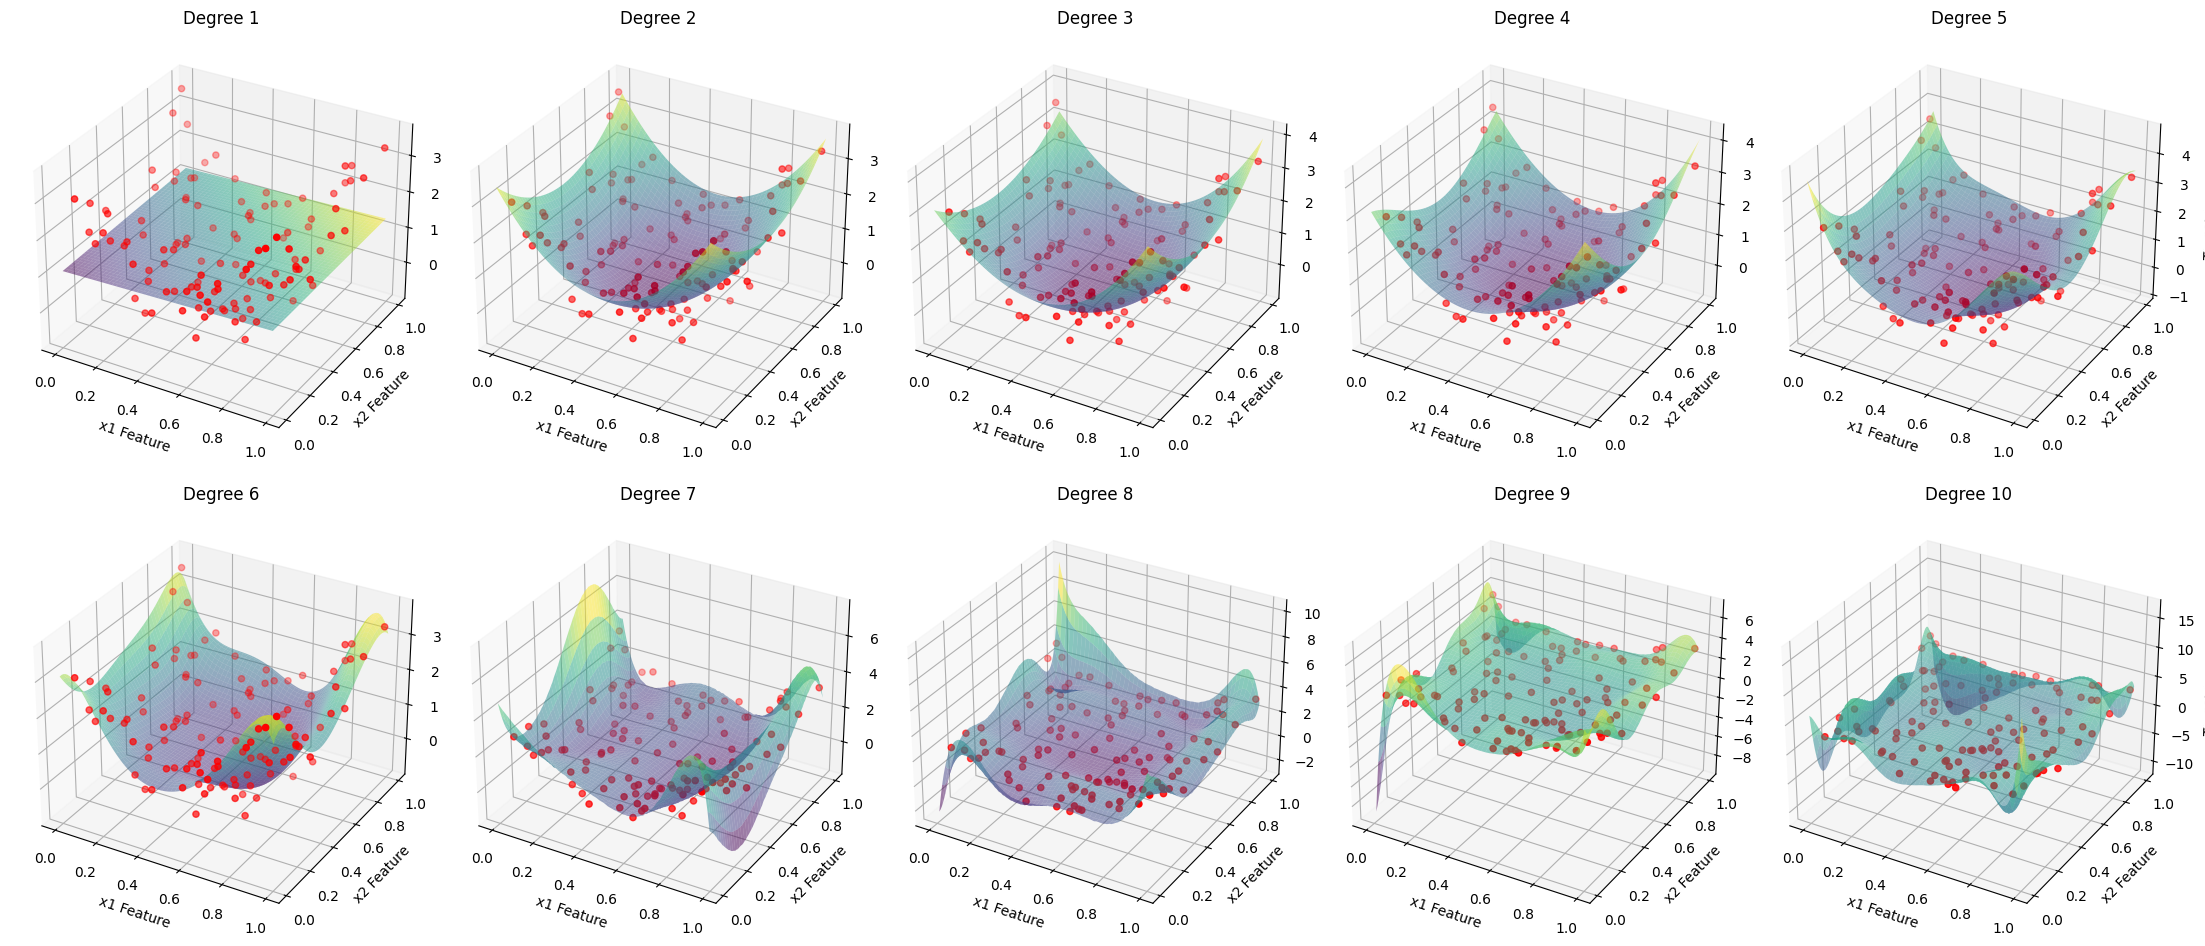

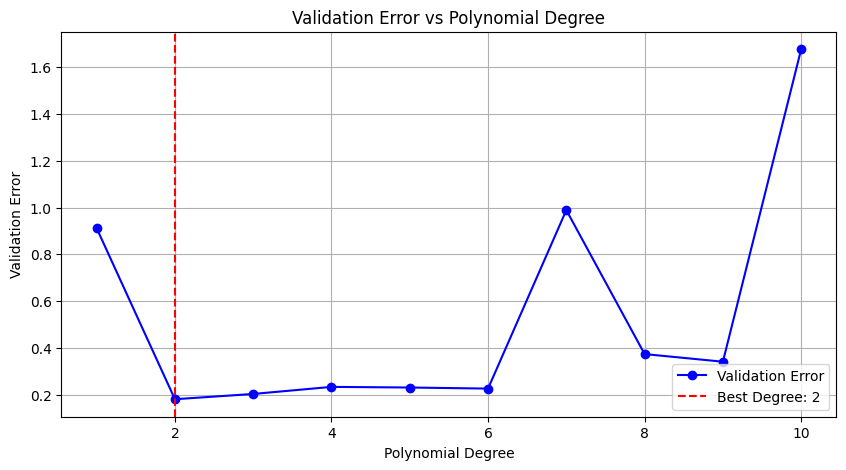

In [76]:

# Extract features and target from the training set and validation set
X_train = training_set[['x1', 'x2']].values
y_train = training_set['y'].values

X_val = validation_set[['x1', 'x2']].values
y_val = validation_set['y'].values

# Initialize empty lists to store validation errors for each degree
validation_errors = []

degrees = range(1, 11)

# Creating a single figure for all subplots
fig = plt.figure(figsize=(22, 10))
best_error = float('inf')

for degree in degrees:
    # Create  and fitting polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Plot the learned function surface
    ax = fig.add_subplot(2, 5, degree, projection='3d')

    # Plot training data set examples
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o', label='Training Set')

    # Plot the surface
    x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)

    x1_range, x2_range = np.meshgrid(x1_range, x2_range)
    X_range_poly = poly.transform(np.c_[x1_range.ravel(), x2_range.ravel()])
    y_range_pred = model.predict(X_range_poly)
    y_range_pred = y_range_pred.reshape(x1_range.shape)

    ax.plot_surface(x1_range, x2_range, y_range_pred, alpha=0.5, cmap='viridis', label=f'Degree {degree} Surface')
    ax.set_xlabel('x1 Feature')
    ax.set_ylabel('x2 Feature')
    ax.set_zlabel('Target Label (y)')
    ax.set_title(f'Degree {degree}')

    # Calculate mean squared error as the validation error
    X_val_poly = poly.transform(X_val)
    y_val_pred = model.predict(X_val_poly)
    validation_error = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(validation_error)
    if validation_error < best_error:
        best_error = validation_error
        best_degree = degree

plt.tight_layout()


plt.show()

# Plot the validation error vs polynomial degree curve more beautifully
plt.figure(figsize=(10, 5))
plt.plot(degrees, validation_errors, marker='o', linestyle='-', color='b', label='Validation Error')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error')

plt.axvline(x=best_degree, color="red", linestyle="--", label=f"Best Degree: {best_degree}")

plt.grid(True)
plt.legend()
plt.show()


**In this analysis, I explored the impact of polynomial degree on regression models, ranging from 1 to 10, to find the optimal and the least validation error using mean squared error on the validation set.
The point of minimum validation error as shown in the figure apove it is degree 2**



### **[3]Optimizing Ridge Regression: Detecting the Best Regularization Parameter (Alpha) for Polynomial Degree 8**

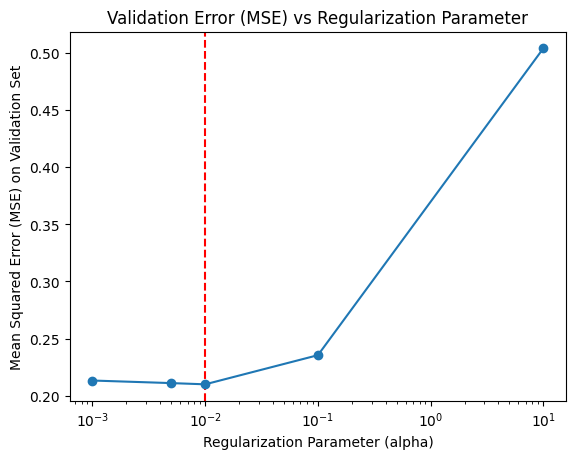

Best Regularization Parameter: 0.01


In [55]:

# Apply polynomial regression of degree 8
degree = 8
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)

# Define alphas list
alphas = [0.001, 0.005, 0.01, 0.1, 10]

# Initialize empty lists to store MSE values
mse_error = []

# For loop to apply Ridge regression for each alpha value
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_poly_train, y_train)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_poly_val)

    # Calculate MSE on the validation set
    mse = mean_squared_error(y_val, y_val_pred)
    mse_error.append(mse)

# to find the best regularization parameter based on minimum MSE
best_alpha = alphas[np.argmin(mse_error)]
plt.axvline(x=best_alpha, color="red", linestyle="--", label=f"Best Degree: {best_alpha}")

plt.plot(alphas, mse_error, marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Squared Error (MSE) on Validation Set')
plt.title('Validation Error (MSE) vs Regularization Parameter')
plt.show()




print('Best Regularization Parameter:', best_alpha)

**In this part, I find the best regularization parameter alpha from the array list, by using the ridge regression on the training set to fit a polynomial of degree 8.
As shown apove, the best alpha was found and it is = 0.01.**


---



# **PART TWO**
### **[1] Learning a Linear Decision Boundary and Evaluating Accuracy on Training and Testing Sets**

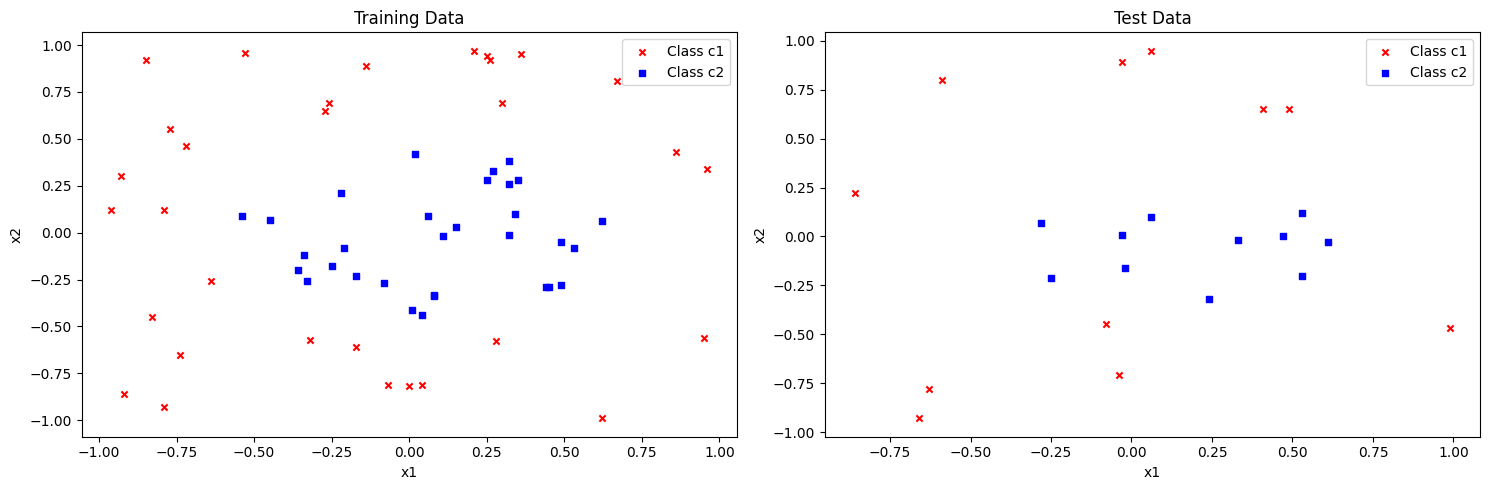

In [78]:
train_data=pd.read_csv('/content/train_cls.csv')
test_data=pd.read_csv('/content/test_cls.csv')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Separate the training data into two classes based on the target label c1 and c2
train_c1 = train_data[train_data['class'] == 'C1']
train_c2 = train_data[train_data['class'] == 'C2']

ax1.scatter(train_c1['x1'], train_c1['x2'], c='red', marker='x', label='Class c1', s=20)
ax1.scatter(train_c2['x1'], train_c2['x2'], c='blue', marker='s', label='Class c2', s=20)
ax1.set_title('Training Data')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# Separate the testing data into two classes based on the target label c1 and c2
test_c1 = test_data[test_data['class'] == 'C1']
test_c2 = test_data[test_data['class'] == 'C2']

ax2.scatter(test_c1['x1'], test_c1['x2'], c='red', marker='x', label='Class c1', s=20)
ax2.scatter(test_c2['x1'], test_c2['x2'], c='blue', marker='s', label='Class c2', s=20)
ax2.set_title('Test Data')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.legend()
plt.tight_layout()
plt.show()


 **The figures apove represents the a set of training examples and testing examples for a binary classification.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Training Accuracy: 0.6612903225806451

Testing Accuracy: 0.6818181818181818


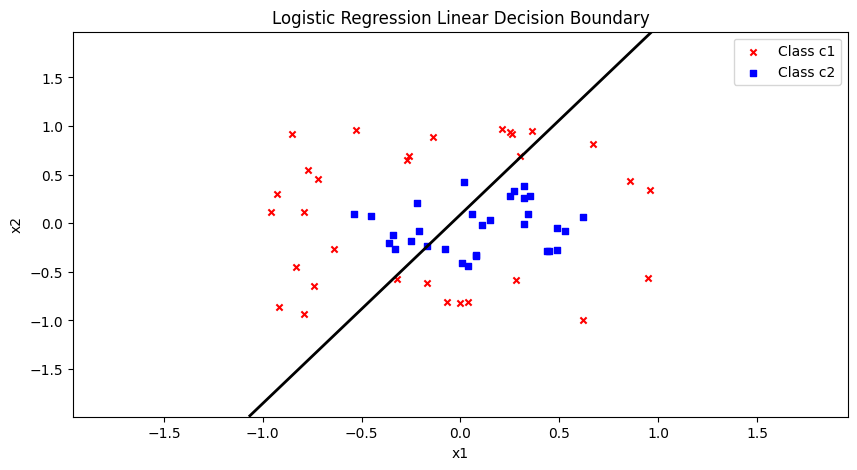

In [94]:

# Load the training data and testing data
train_data = pd.read_csv('/content/train_cls.csv')
testin_data=pd.read_csv('/content/test_cls.csv')

# Extract features and target variable
X_train = train_data[['x1', 'x2']]
y_train = train_data['class']

# Separate the training data into two classes based on the target label c1 and c2
train_c1 = train_data[train_data['class'] == 'C1']
train_c2 = train_data[train_data['class'] == 'C2']

X_test = testin_data[['x1', 'x2']]
y_test = testin_data['class']

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train.values, y_train)

# Create the decision boundary
Xmin, Xmax = X_train["x1"].min() - 1, X_train["x1"].max() + 1
Ymin, Ymax = X_train["x2"].min() - 1, X_train["x2"].max() + 1
x, y = np.meshgrid(np.linspace(Xmin, Xmax, 300), np.linspace(Ymin, Ymax, 300))
Z = model.predict_proba(np.c_[x.ravel(), y.ravel()])[:, 1]
Z = Z.reshape(x.shape)

# Compute and display accuracy
training_accuracy = model.score(X_train, y_train)
testing_accuracy=model.score(X_test,y_test)


# Plot the decision boundary
plt.figure(figsize=(10, 5))
contour = plt.contour(x, y, Z, levels=[0.5], colors='black', linewidths=2)

# Plot the training data points
plt.scatter(train_c1['x1'], train_c1['x2'], c='red', marker='x', label='Class c1', s=20)
plt.scatter(train_c2['x1'], train_c2['x2'], c='blue', marker='s', label='Class c2', s=20)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Linear Decision Boundary")
plt.legend()


print("\nTraining Accuracy:", training_accuracy)
print("\nTesting Accuracy:", testing_accuracy)

plt.show()


**Used logistic regression to make a model with a straight-line decision boundary. Plotted this boundary on a scatterplot of the training set to see how it classifies data. I checked how accurate it was on both the training and testing data to understand its overall performance.
so i noticed that the training accuracy is equal to testing accuracy which almost to 0.68**

---



###**[2] Learning a Quadratic Decision Boundary**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



Training Accuracy (Quadratic Model): 0.967741935483871
Testing Accuracy (Quadratic Model): 0.9545454545454546


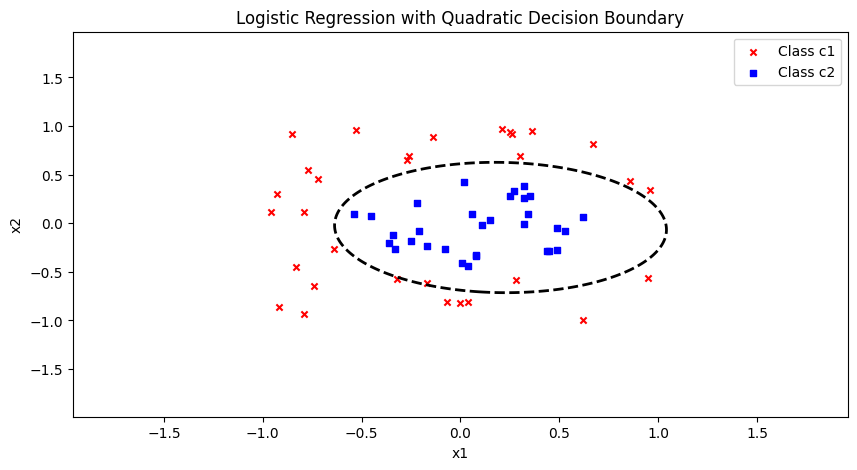

In [92]:
# Load the training data and testing data
train_data = pd.read_csv('/content/train_cls.csv')
test_data = pd.read_csv('/content/test_cls.csv')

# Extract features and target variable for training set and testing set
X_train = train_data[['x1', 'x2']]
y_train = train_data['class']

# Separate the training data into two classes based on the target label c1 and c2
train_c1 = train_data[train_data['class'] == 'C1']
train_c2 = train_data[train_data['class'] == 'C2']

X_test = test_data[['x1', 'x2']]
y_test = test_data['class']

# Create polynomial features of degree 2
quadratic_poly = PolynomialFeatures(degree=2)
XPolyTrain = quadratic_poly.fit_transform(X_train)
XPolyTest = quadratic_poly.transform(X_test)

# Create and train the Logistic Regression model with quadratic decision boundary
model_quadratic = LogisticRegression()
model_quadratic.fit(XPolyTrain, y_train)

# Create the decision boundary for quadratic model
Xmin, Xmax = X_train["x1"].min() - 1, X_train["x1"].max() + 1
Ymin, Ymax = X_train["x2"].min() - 1, X_train["x2"].max() + 1

x, y = np.meshgrid(np.linspace(Xmin, Xmax, 300), np.linspace(Ymin, Ymax, 300))

X_poly_meshgrid = quadratic_poly.transform(np.c_[x.ravel(), y.ravel()])

Z_quadratic = model_quadratic.predict_proba(X_poly_meshgrid)[:, 1]
Z_quadratic = Z_quadratic.reshape(x.shape)

# Compute and display accuracy for quadratic model
training_accuracy_quadratic = model_quadratic.score(XPolyTrain, y_train)
testing_accuracy_quadratic = model_quadratic.score(XPolyTest, y_test)

# Plot the decision boundary for quadratic model
plt.figure(figsize=(10, 5))

# Plot the decision boundary and Plot the training data points
contour_quadratic = plt.contour(x, y, Z_quadratic, levels=[0.5], colors='k', linewidths=2, linestyles='dashed')

plt.scatter(train_c1['x1'], train_c1['x2'], c='red', marker='x', label='Class c1', s=20)
plt.scatter(train_c2['x1'], train_c2['x2'], c='blue', marker='s', label='Class c2', s=20)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression with Quadratic Decision Boundary")
plt.legend()

print("\nTraining Accuracy (Quadratic Model):", training_accuracy_quadratic)
print("Testing Accuracy (Quadratic Model):", testing_accuracy_quadratic)

plt.show()


**This part uses logistic regression for binary classification on training and testing datasets with a quadratic decision boundary, involve polynomial features. The accuracy of the quadratic model is calculated and displayed alongside its decision boundary on the scatterplot.**

### **[3] Comments on the learned models in Linear regression desicion boundary and Quadratic regression in desicion boundary in terms of overfitting and underfitting**

**The first part talks about a straight line (linear regression decision boundary) that doesn't effectively divide or classify the data, so it's considered underfitting. The second part introduces a curvier line (quadratic regression decision boundary) this boundary is recognized for successfully separating the data and simplifies classification, representing a good-fitting model. Unlike the linear boundary, the quadratic one is consider suitable and making it a good fit without being overly complex. Also i noticed that the accuracy data set and testing set is being very close to other.**